
# Pymaceuticals Inc.


### Analysis

- ANALYSIS NEEDED


In [1]:
# Dependencies and Setup
import os
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = Path("Starter_Code\\Pymaceuticals\\data\\Mouse_metadata.csv")
study_results_path = Path("Starter_Code\\Pymaceuticals\\data\\Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = complete["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint.
duplicates = complete[complete.duplicated(['Mouse ID', 'Timepoint'])]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_ID = duplicates['Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_all = complete[complete['Mouse ID'] == "g989"]
duplicate_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexDuplicates = complete[(complete['Mouse ID'] == 'g989')].index
complete.drop(indexDuplicates, inplace=True)
complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
final_mice_count = complete["Mouse ID"].nunique()
final_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_summary = complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([('Mean Tumor Volume', np.mean), ('Median Tumor Volume', np.median), ('Tumor Volume Variance', np.var), ('Tumor Volume Std. Dev.', np.std), ('Tumor Volume Std. Err.', st.sem)

])

regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary =  complete.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

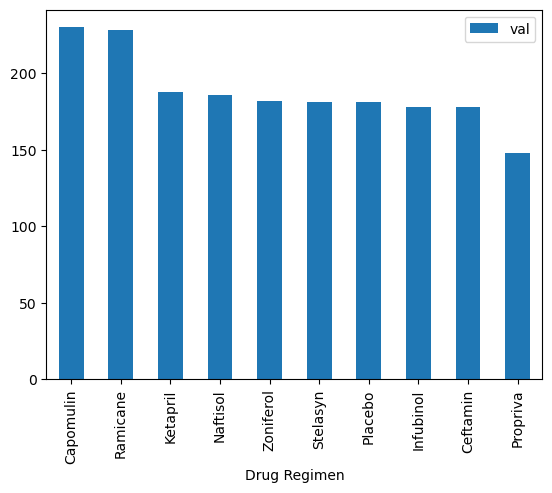

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

pd_timepoints = pd.DataFrame({'Drug Regimen':["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"], 'val':[230, 228, 188, 186, 182, 181, 181, 178, 178, 148]})
ax = pd_timepoints.plot.bar(x='Drug Regimen', y='val', rot=90)

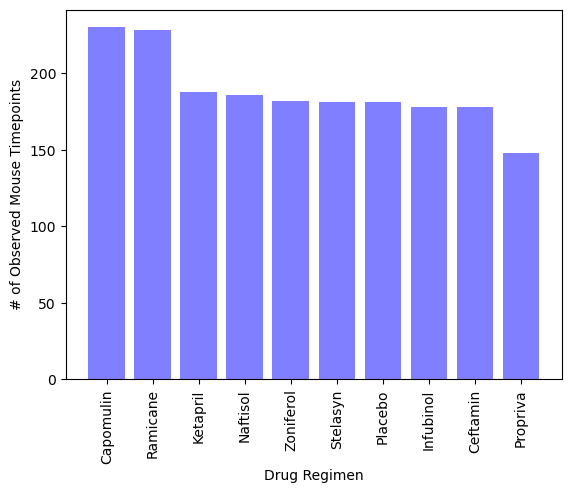

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

timepoints = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
y_axis = np.arange(len(timepoints))

drug_regimen = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
x_axis = np.arange(len(drug_regimen))

plt.bar(drug_regimen, timepoints, color='b', alpha=0.5, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

<Axes: ylabel='Sex'>

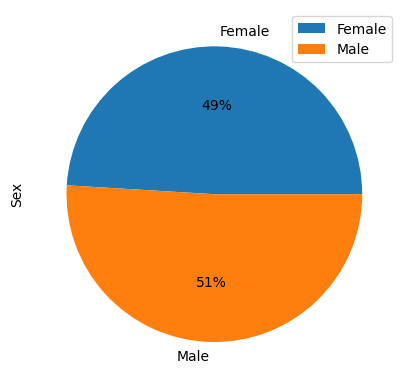

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# DataFrame of each student and the votes they get 
gender_df = pd.DataFrame({'Gender': ['Male', 'Female'], 
                          'Sex': [958, 922]}) 
gender_df.groupby(['Gender']).sum().plot(kind='pie', y='Sex', autopct='%1.0f%%')

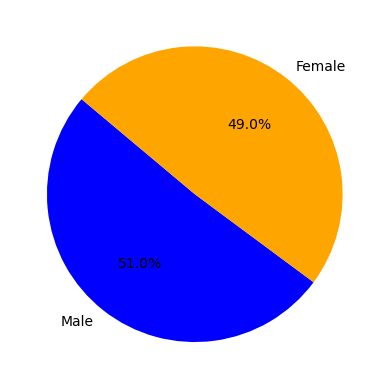

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [958, 922]
colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = complete.loc[complete["Drug Regimen"] == "Capomulin",:]
Ceftamin = complete.loc[complete["Drug Regimen"] == "Ceftamin", :]
Infubinol = complete.loc[complete["Drug Regimen"] == "Infubinol", :]
Ramicane = complete.loc[complete["Drug Regimen"] == "Ramicane", :]

# Start by getting the last (greatest) timepoint for each mouse
final_tumor = complete.groupby(['Mouse ID'])['Timepoint'].max()

final_tumor = final_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = final_tumor.merge(complete,on=['Mouse ID','Timepoint'],how='left')

merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset 
    # Determine outliers using upper and lower bounds
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    vol_tumor = merged_data.loc[merged_data['Drug Regimen']==treatment,'Tumor Volume (mm3)']
    
    # add subset 
    vol_data.append(vol_tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = vol_tumor.quantile([.25,.5,.75])
    l_quartile = quartiles[0.25]
    u_quartile = quartiles[0.75]
    iqr = u_quartile - l_quartile
    l_bound = l_quartile - (1.5*iqr)
    u_bound = u_quartile + (1.5*iqr)

    outliers = vol_tumor.loc[(vol_tumor>u_bound)|(vol_tumor<l_bound)]
    print(f'{treatment} outliers {outliers}')


Capomulin outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


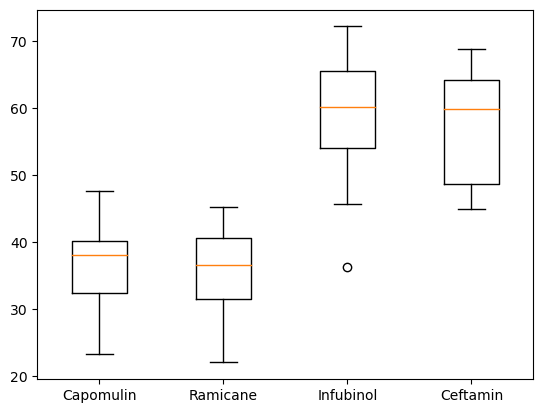

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplots = dict(marker='o', markerfacecolor='o', markersize=12,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(vol_data,labels=treatments)

plt.show()

## Line and Scatterplots

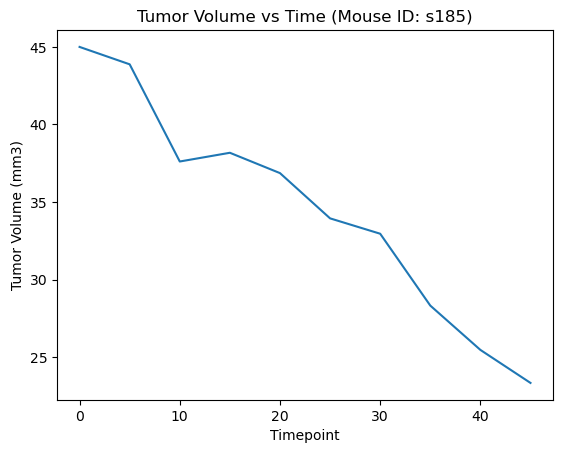

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mice_data = complete[['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen']]
mouse_data = mice_data[mice_data["Mouse ID"] == "s185"]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Time (Mouse ID: s185)')


#print(single_mouse_data)
plt.show()

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = complete['Mouse ID'] == ('l509')

tumor_volume = mouse['Tumor Volume (mm3)']
timepoint = mouse['Timepoint']

plt.plot(timepoint, tumor_volume)

plt.show()

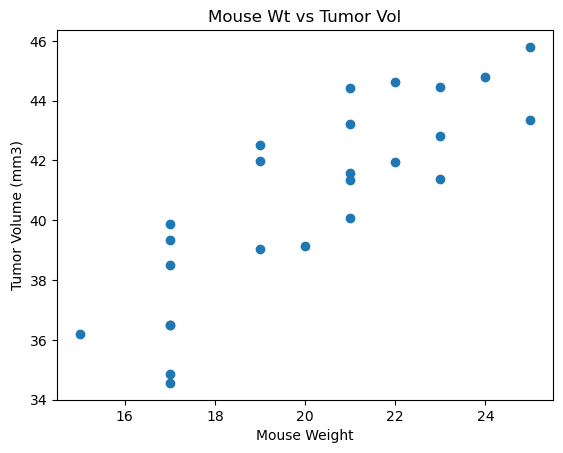

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

single_drug_data = complete[complete["Drug Regimen"] == "Capomulin"]
avg_tumor_vol = single_drug_data.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

#plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])

plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Tumor Volume')
plt.show() 

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

avg_tumor_vol = single_drug_data.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()
correlation = st.pearsonr(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
print(correlation)


PearsonRResult(statistic=0.8419363424694719, pvalue=1.3225722434712605e-07)
